In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [46]:
data = pd.read_json("GEP_eps_results.json")
print("columns:", list(data.columns))

columns: ['N', 'avg_eps', 'max_eps']


In [47]:
y = np.log(data["max_eps"])

X = data.copy()
X["lnN"] = np.log(X["N"])
X["const"] = 1
X = X.drop(columns=["N", "avg_eps", "max_eps"])

In [48]:
model = LinearRegression()
model.fit(X, y)

alpha = model.coef_[0]
C = model.coef_[1]

N_power_alpha = np.pow(data["N"], alpha)

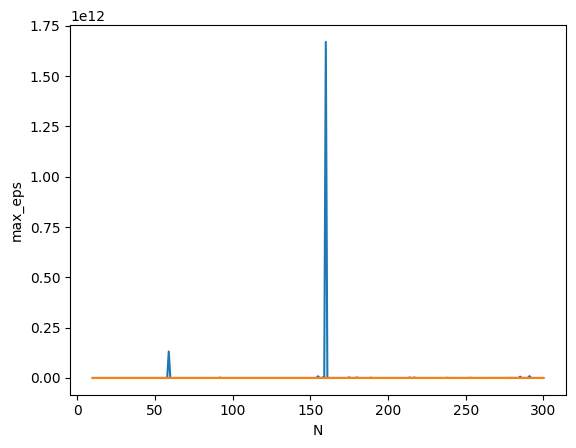

In [49]:
sns.lineplot(x=data["N"], y=data["max_eps"])
sns.lineplot(x=data["N"], y=N_power_alpha);